In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import spacy
from textblob import TextBlob
from wordcloud import STOPWORDS, WordCloud
import re
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer,TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
nlp = spacy.load("en_core_web_sm")
nltk.download("all")

In [ ]:
df = pd.read_csv("amazonreviews.tsv", on_bad_lines="skip", sep="\t", header=None, names=["label", "review"])[1:]
print(df.shape)
df.head()

(10000, 2)


,label,review
1,pos,Stuning even for the non-gamer: This sound tra...
2,pos,The best soundtrack ever to anything.: I'm rea...
3,pos,Amazing!: This soundtrack is my favorite music...
4,pos,Excellent Soundtrack: I truly like this soundt...
5,pos,"Remember, Pull Your Jaw Off The Floor After He..."


In [ ]:
english_stopwords = stopwords.words("english")
print(english_stopwords)
print(len(english_stopwords))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

# 1. Data Processing and EDA

In [ ]:
print(df.duplicated().sum())
print(df.isnull().sum().sum())

0
0


In [ ]:
df['len'] = df['review'].apply(len)

array([<Axes: title={'center': 'neg'}>, <Axes: title={'center': 'pos'}>],
      dtype=object)

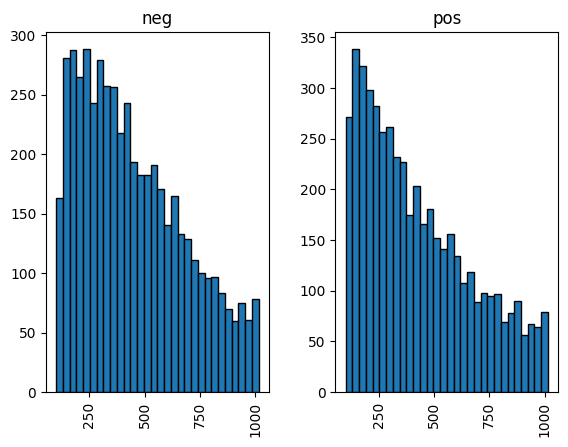

In [ ]:
df.hist('len',by='label',bins=30,edgecolor='black')

In [ ]:
def data_clean(data):
  text=' '.join(re.findall('\w+',data))
  doc= nlp(text)
  cleaned_text= [token.lemma_ for token in doc if not token.is_stop and not token.is_punct
                 and not token.is_digit and not token.is_bracket and not token.is_currency and token.lemma_ not in STOPWORDS]
  return " ".join(cleaned_text)

<>:2: SyntaxWarning: invalid escape sequence '\w'
<>:2: SyntaxWarning: invalid escape sequence '\w'
/tmp/ipython-input-2989148168.py:2: SyntaxWarning: invalid escape sequence '\w'
  text=' '.join(re.findall('\w+',data))


In [ ]:
df["review"] = df["review"].apply(data_clean)

In [ ]:
def word_cloud(image):
  plt.figure(figsize=(10,10))
  plt.imshow(image)
  plt.axis("off")
  # plt.savefig("wordcloud.png", format="png")
  plt.show()

In [ ]:
doc = [i.strip() for i in df["review"]]
text = " ".join(doc)

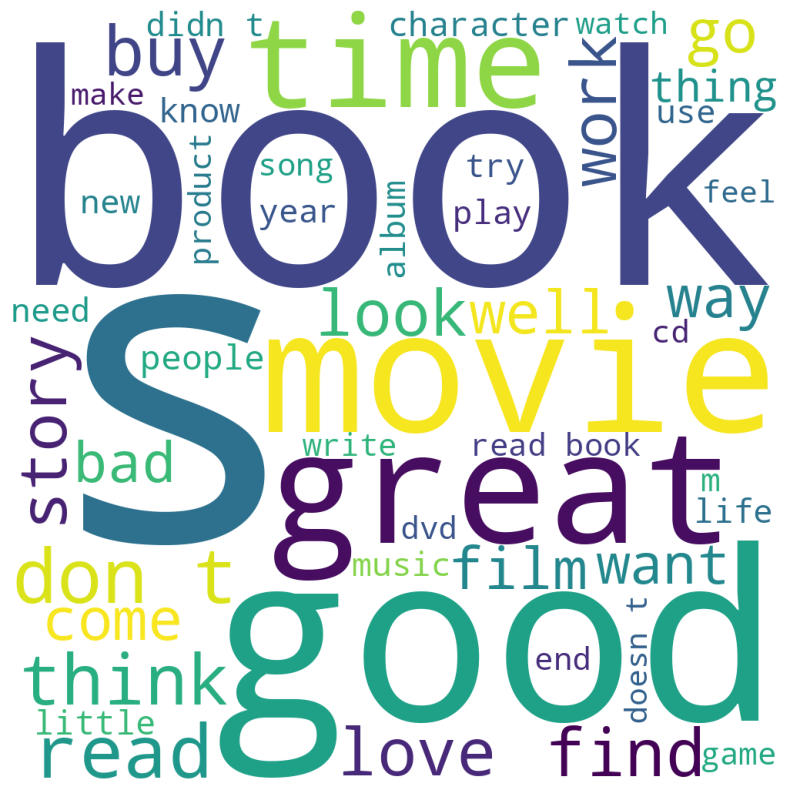

In [ ]:
'''
Preparin the word cloud
'''

word_cl = WordCloud(width=1000, height=1000, background_color="white", max_words=50).generate(text)
word_cloud(word_cl)

In [ ]:
def blob_value(txt):
  text = TextBlob(txt)
  return text.sentiment.polarity

def vader_sentiment(txt):
  vader = SentimentIntensityAnalyzer()
  return vader.polarity_scores(txt)["compound"]

'''

1) Compound = -1 to -0.05 => Negative
2) Compound = -0.05 to 0.05 => Neutral
3) Compound = 0.05 to 1 => Positive
'''

'\n\n1) Compound = -1 to -0.05 => Negative\n2) Compound = -0.05 to 0.05 => Neutral\n3) Compound = 0.05 to 1 => Positive\n'

In [ ]:
wordRecord = {}
for review in df["review"]:
  doc = nlp(review)
  for token in doc:
    word = token.lemma_.lower()
    wordRecord[word] = wordRecord.get(word, {
        "count":0,
        "score":vader_sentiment(word)
    })
    wordRecord[word]["count"] += 1
print(wordRecord)


{'stun': {'count': 4, 'score': 0.0}, 'non': {'count': 142, 'score': 0.0}, 'gamer': {'count': 4, 'score': 0.0}, 'sound': {'count': 706, 'score': 0.0}, 'track': {'count': 375, 'score': 0.0}, 'beautiful': {'count': 273, 'score': 0.5994}, 'paint': {'count': 69, 'score': 0.0}, 'senery': {'count': 1, 'score': 0.0}, 'mind': {'count': 267, 'score': 0.0}, 'recomend': {'count': 40, 'score': 0.0}, 'people': {'count': 944, 'score': 0.0}, 'hate': {'count': 116, 'score': -0.5719}, 'vid': {'count': 2, 'score': 0.0}, 'game': {'count': 864, 'score': 0.0}, 'music': {'count': 885, 'score': 0.0}, 'play': {'count': 830, 'score': 0.34}, 'chrono': {'count': 5, 'score': 0.0}, 'cross': {'count': 59, 'score': 0.0}, 'good': {'count': 3806, 'score': 0.4404}, 'back': {'count': 16, 'score': 0.0}, 'away': {'count': 387, 'score': 0.0}, 'crude': {'count': 22, 'score': -0.5719}, 'keyboarding': {'count': 1, 'score': 0.0}, 'take': {'count': 730, 'score': 0.0}, 'fresher': {'count': 2, 'score': 0.0}, 'step': {'count': 107,

In [17]:
wordDf = pd.DataFrame.from_dict(wordRecord, orient="index")
wordDf = wordDf.reset_index().rename(columns={"index": "word"})

print(len(wordDf))
wordDf.head()

25678


,word,count,score
0,stun,4,0.0
1,non,142,0.0
2,gamer,4,0.0
3,sound,706,0.0
4,track,375,0.0


In [18]:
'''
Getting the most positve and negative words
'''


print(wordDf[wordDf["score"] == wordDf["score"].max()])
print(wordDf[wordDf["score"] == wordDf["score"].min()])

                word  count   score
3888             aml      1  0.6597
19218  magnificently      2  0.6597
         word  count   score
19012  rapist      2 -0.7096


In [38]:
'''
Getting the most common positve and negative words
'''

positiveWords = wordDf[wordDf["score"] > 0.05]
negativeWords = wordDf[wordDf["score"] < -0.05]
print(positiveWords[positiveWords["count"] == positiveWords["count"].max()])
print(negativeWords[negativeWords["count"] == negativeWords["count"].max()])

    word  count   score
18  good   3806  0.4404
    word  count   score
221  bad   1480 -0.5423


# 2. Model Building

In [29]:
df.head()

,label,review,len
1,pos,stun non gamer sound track beautiful paint sen...,426
2,pos,good soundtrack m read lot review say good gam...,509
3,pos,amazing soundtrack favorite music time hand in...,760
4,pos,Excellent Soundtrack truly soundtrack enjoy vi...,743
5,pos,remember pull Jaw floor hear ve play game know...,481


In [30]:
'''
Splitting the data
'''

x_train,x_test,y_train,y_test= train_test_split(df['review'],df['label'],train_size=0.8,random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000,)
(2000,)
(8000,)
(2000,)


In [32]:
pipeline= Pipeline([('tfidf',TfidfVectorizer(ngram_range=(1,1))),
                        ('classifier',RandomForestClassifier(n_estimators=100))])

In [33]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

In [36]:
y_pred= pipeline.predict(x_test)

In [37]:
accuracy_score(y_test,y_pred)

0.8375